In [1]:
using Turing, Distributions
using PyPlot, PyCall
using Mamba: describe

[Turing]: AD chunk size is set as 40


In [10]:
y1 = 10 * sin.(0:0.5:2pi); y1 += randn(length(y1))
y2 = 10 * cos.(0:0.5:2pi); y2 += randn(length(y2))
y = [y1'; y2']
N = size(y)[end];  K = 20;

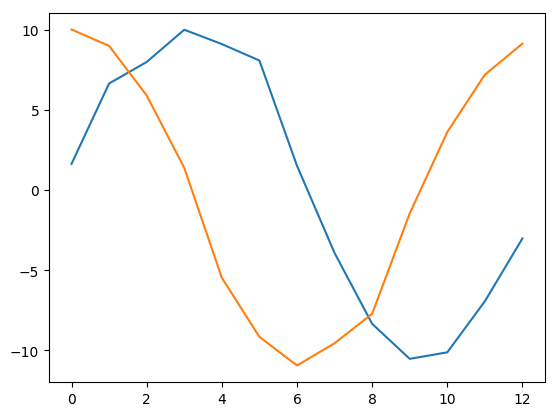

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa357a52f10>

In [11]:
plot(y1)
plot(y2)

In [12]:
# @model BayesHmm(y) = begin
#     s = tzeros(Int, N)
#     m = Vector{Real}(K)
#     T = Vector{Vector{Real}}(K)
#     for i = 1:K
#         T[i] ~ Dirichlet(ones(K)/K)
#         # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
#         m[i] ~ Normal(i, 0.01)
#     end
#     s[1] ~ Categorical(ones(Float64, K)/K)
#     for i = 2:N
#         s[i] ~ Categorical(vec(T[s[i-1]]))
#         y[i] ~ Normal(m[s[i]], 0.01)
#     end
#     return(s, m)
# end

@model FHMM(y) = begin
    s1 = tzeros(Int, N)
    s2 = tzeros(Int, N)
    m1 = Vector{Real}(K)
    m2 = Vector{Real}(K)
    T1 = Vector{Vector{Real}}(K)
    T2 = Vector{Vector{Real}}(K)
    for i = 1:K
        T1[i] ~ Dirichlet(ones(K)/K)
        T2[i] ~ Dirichlet(ones(K)/K)
        m1[i] ~ Normal(i-10, 0.01)
        m2[i] ~ Normal(i-10, 0.01)
    end
    s1[1] ~ Categorical(ones(Float64, K)/K)
    s2[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s1[i] ~ Categorical(vec(T1[s1[i-1]]))
        s2[i] ~ Categorical(vec(T2[s2[i-1]]))
        y[:,i] ~ MvNormal([m1[s1[i]], m2[s2[i]]], 1 * ones(2))
    end
end

FHMM (generic function with 2 methods)

In [13]:
g = Gibbs(300, HMC(1, 0.02, 3, :m1, :T1, :m2, :T2), PG(25, 1, :s1, :s2))
c = sample(FHMM(y), g);

[Turing]:  Assume - `T1` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `T2` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m1` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m2` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `s1` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `s2` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `y` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[Gibbs] Sampling...100%  ETA: 0:00:02

[Gibbs] Finished with
  Running time    = 513.0357451030004;


[Gibbs] Sampling...100% Time: 0:08:33


In [14]:
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
                    Mean                         SD                               Naive SE                       MCSE              ESS    
     s2[6]        2.95333333×10⁰                     1.92096919×10⁰                    1.109072079×10⁻¹       3.625986456×10⁻¹  28.0665120
 T2[17][1]      2.188341986×10⁻¹                  1.5730849775×10⁻²                 9.082210352355×10⁻⁴     2.38375195236×10⁻³  43.5494068
 T2[17][2]      1.791292248×10⁻¹                  2.1163262318×10⁻²                  1.22186151961×10⁻³     9.23657477981×10⁻³   5.2498069
 T2[17][3]     5.9403433531×10⁻²                 8.79623011546×10⁻³                 5.078505825017×10⁻⁴     4.30916857669×10⁻³   4.1668340
 T2[17][4]      1.549498431×10⁻¹                 8.87716402513×10⁻³                 5.125233039551×10⁻⁴      2.2640974349×10⁻³  15.3729871
 T2[17][5]     9.2804056297×10⁻²                   1.02980

T2[19][20]  4.9488376468709×10⁻⁵              8.09316083731063×10⁻⁶               4.67258858801623×10⁻⁷  1.77216386216783×10⁻⁶  20.8558834
    m2[19]        6.87345683×10⁰                     7.95148154×10⁰                    4.590790006×10⁻¹       5.354209351×10⁻¹ 220.5491627
  T2[9][1]      5.231961812×10⁻¹                  7.3988447982×10⁻²                   4.2717250359×10⁻³       4.775733903×10⁻²   2.4002009
  T2[9][2]     6.6929857205×10⁻²                  1.0418295878×10⁻²                 6.015005929458×10⁻⁴     6.40159849431×10⁻³   2.6486008
  T2[9][3]      1.565138602×10⁻¹                  4.1373599666×10⁻²                  2.38870589047×10⁻³      2.7888039961×10⁻²   2.2009523
  T2[9][4]     9.3706419564×10⁻²                  1.1743770351×10⁻²                 6.780268973658×10⁻⁴     4.84928650707×10⁻³   5.8648838
  T2[9][5]     6.9229310802×10⁻²                  1.0295745391×10⁻²                 5.944251372882×10⁻⁴     3.90730989906×10⁻³   6.9432032
  T2[9][6]    9.66660316577

 T1[18][2]     6.0696688229×10⁻²                 9.09467941475×10⁻³                 5.250815608298×10⁻⁴     5.02900136886×10⁻³   3.2704784
 T1[18][3]      1.079275694×10⁻¹                  3.3791202029×10⁻²                  1.95093595877×10⁻³      2.1445995093×10⁻²   2.4826465
 T1[18][4]      2.693812517×10⁻¹                  3.8297532598×10⁻²                  2.21110907547×10⁻³       2.326612257×10⁻²   2.7095275
 T1[18][5]     4.7010311603×10⁻²                 4.71746933091×10⁻³                 2.723632188093×10⁻⁴    2.883291127324×10⁻⁴ 267.6955672
 T1[18][6]     9.4059729418×10⁻²                  1.7794513341×10⁻²                  1.02736670674×10⁻³      1.0361965888×10⁻²   2.9490892
 T1[18][7]     8.8339790212×10⁻²                 9.82776343378×10⁻³                 5.674061864022×10⁻⁴     5.78867699672×10⁻³   2.8823768
 T1[18][8]    6.32992779514×10⁻³                 1.13867564071×10⁻³                6.5741468768281×10⁻⁵      6.9991706287×10⁻⁴   2.6467133
 T1[18][9]     3.3549841446

  T2[2][2]      2.846080853×10⁻¹                  3.0440407812×10⁻²                  1.75747776446×10⁻³      1.3118706503×10⁻²   5.3841717
  T2[2][3]       2.48391848×10⁻¹                  4.2180774552×10⁻²                  2.43530815422×10⁻³      2.4006393958×10⁻²   3.0872745
  T2[2][4]     5.2140922318×10⁻²                 6.10675738438×10⁻³                 3.525738019746×10⁻⁴     3.08580810633×10⁻³   3.9163681
  T2[2][5]     5.4044808775×10⁻²                 4.06492701424×10⁻³                 2.346886705906×10⁻⁴     1.07063054299×10⁻³  14.4153850
  T2[2][6]      9.438200376×10⁻²                  2.4280975431×10⁻²                   1.4018627701×10⁻³      1.6238324624×10⁻²   2.2358868
  T2[2][7]     6.5207104497×10⁻²                 9.66608654141×10⁻³                 5.580717666695×10⁻⁴     5.40250533284×10⁻³   3.2011863
  T2[2][8]     3.5061082373×10⁻²                  6.5185392587×10⁻³                 3.763480395734×10⁻⁴     2.63333305333×10⁻³   6.1275800
  T2[2][9]     3.1331301281

  T1[5][3]      1.175629686×10⁻¹                  1.5861658725×10⁻²                 9.157732934947×10⁻⁴     8.02737504302×10⁻³   3.9043622
  T1[5][4]      3.904579112×10⁻²                  1.2000662372×10⁻²                 6.928585651147×10⁻⁴     7.20812602251×10⁻³   2.7718243
  T1[5][5]     6.4464991007×10⁻²                  1.7432896984×10⁻²                  1.00648877663×10⁻³     9.36841527341×10⁻³   3.4626362
  T1[5][6]     5.4888071301×10⁻²                  1.4035816044×10⁻²                 8.103582171329×10⁻⁴     9.33010308266×10⁻³   2.2630933
  T1[5][7]     4.0711968116×10⁻²                 7.63608582619×10⁻³                 4.408696207307×10⁻⁴     4.23399572924×10⁻³   3.2526757
  T1[5][8]     6.9051521441×10⁻²                  2.0819984638×10⁻²                   1.2020423735×10⁻³      1.2706096402×10⁻²   2.6849519
  T1[5][9]     6.4902335199×10⁻²                 8.51743330053×10⁻³                 4.917542408863×10⁻⁴     4.46883122557×10⁻³   3.6327004
 T1[5][10]     2.7455862827

 T2[10][5]     7.5314534028×10⁻²                 9.00534802578×10⁻³                 5.199240106832×10⁻⁴     3.02803695264×10⁻³   8.8446095
 T2[10][6]      1.098431015×10⁻¹                  1.7590614028×10⁻²                  1.01559457441×10⁻³     8.78733466134×10⁻³   4.0072613
 T2[10][7]     4.2142196909×10⁻²                 9.37717605955×10⁻³                 5.413915122222×10⁻⁴     6.03801403912×10⁻³   2.4118811
 T2[10][8]     5.4722801629×10⁻²                 6.67677454941×10⁻³                 3.854837583421×10⁻⁴     1.81603239528×10⁻³  13.5171845
 T2[10][9]     2.4580293144×10⁻²                 2.96584529347×10⁻³                 1.712331578557×10⁻⁴     1.50103531439×10⁻³   3.9040482
T2[10][10]     7.5826291627×10⁻²                  9.6539370339×10⁻³                 5.573703145261×10⁻⁴      6.1300241614×10⁻³   2.4801877
T2[10][11]     1.1139656014×10⁻²                  2.3142519676×10⁻³                 1.336133996467×10⁻⁴     1.39134201671×10⁻³   2.7666453
T2[10][12]    6.30092060159

  T2[4][2]      1.240114066×10⁻¹                  1.1294163893×10⁻²                 6.520688563825×10⁻⁴     4.75840599724×10⁻³   5.6335893
  T2[4][3]      2.955444859×10⁻¹                  4.5328682393×10⁻²                  2.61705269818×10⁻³       2.934972926×10⁻²   2.3852724
  T2[4][4]      1.976022891×10⁻¹                  2.4797412837×10⁻²                  1.43167929765×10⁻³      9.3287082329×10⁻³   7.0659364
  T2[4][5]     2.5021669731×10⁻²                 4.64048757952×10⁻³                 2.679186753209×10⁻⁴     2.33743648561×10⁻³   3.9413735
  T2[4][6]      1.036616439×10⁻¹                   1.897422223×10⁻²                  1.09547723123×10⁻³      1.2068928295×10⁻²   2.4716704
  T2[4][7]     3.8630314702×10⁻²                 4.71984604911×10⁻³                 2.725004386989×10⁻⁴     2.74383607099×10⁻³   2.9589617
  T2[4][8]     6.7846219516×10⁻²                 9.65118548362×10⁻³                 5.572114536964×10⁻⁴     4.27715065776×10⁻³   5.0915760
  T2[4][9]      1.802683925

 T1[17][5]      2.162537849×10⁻¹                  3.1298252467×10⁻²                  1.80700544873×10⁻³      1.8636813285×10⁻²   2.8203102
 T1[17][6]     5.5803915451×10⁻²                  1.2697483158×10⁻²                 7.330895319228×10⁻⁴     7.87944964325×10⁻³   2.5968300
 T1[17][7]     3.4043412808×10⁻²                 5.54083107308×10⁻³                 3.199000311577×10⁻⁴    3.519083808818×10⁻⁴ 247.9080331
 T1[17][8]     6.0170714496×10⁻²                 8.55969672723×10⁻³                  4.94194320965×10⁻⁴     1.95776445143×10⁻³  19.1159497
 T1[17][9]     8.0281319366×10⁻²                 9.97575063967×10⁻³                 5.759502317183×10⁻⁴     4.69521864243×10⁻³   4.5141868
T1[17][10]     1.6714167655×10⁻²                 5.45142645482×10⁻³                 3.147382531159×10⁻⁴     3.66302274115×10⁻³   2.2148335
T1[17][11]     1.0687655694×10⁻²                  2.1928537563×10⁻³                 1.266044706493×10⁻⁴     1.26795308702×10⁻³   2.9909763
T1[17][12]    7.51368817179

     s1[1]        9.67666667×10⁰                     6.63114085×10⁰                    3.828490955×10⁻¹         1.87604489×10⁰  12.4936706
     m1[8]       -1.36616671×10⁰                     2.33337612×10⁰                     1.34717533×10⁻¹        1.31482093×10⁻¹ 300.0000000
  T2[5][1]     9.7140956471×10⁻²                  2.3730536837×10⁻²                   1.3700831831×10⁻³      1.4438318129×10⁻²   2.7013566
  T2[5][2]      1.165944747×10⁻¹                  5.3508898661×10⁻²                  3.08933770461×10⁻³      3.5693949226×10⁻²   2.2473092
  T2[5][3]     8.7338068775×10⁻²                  2.2268849919×10⁻²                  1.28569264953×10⁻³      1.4655614591×10⁻²   2.3088063
  T2[5][4]      1.512692483×10⁻¹                  2.0098111482×10⁻²                  1.16036500746×10⁻³      1.1619408997×10⁻²   2.9918680
  T2[5][5]       1.82400044×10⁻¹                  3.0668757687×10⁻²                  1.77066155064×10⁻³      1.9293135853×10⁻²   2.5268923
  T2[5][6]      1.809687731

 T1[10][4]     3.4716925628×10⁻²                 4.44592959223×10⁻³                 2.566858646873×10⁻⁴     2.51439862824×10⁻³   3.1264890
 T1[10][5]       1.09743044×10⁻¹                  1.8952453742×10⁻²                  1.09422042698×10⁻³      1.2046130117×10⁻²   2.4753453
 T1[10][6]      4.542069122×10⁻²                 5.44353240049×10⁻³                 3.142824896763×10⁻⁴      2.6430804502×10⁻³   4.2417089
 T1[10][7]     4.1322720695×10⁻²                 4.47173470434×10⁻³                 2.581757235297×10⁻⁴     2.55035694352×10⁻⁴ 300.0000000
 T1[10][8]     1.7744845667×10⁻²                 2.99238183277×10⁻³                 1.727652456667×10⁻⁴      1.6858490644×10⁻³   3.1506245
 T1[10][9]     2.6787933569×10⁻²                 3.69587513515×10⁻³                 2.133814504172×10⁻⁴     1.77250442799×10⁻³   4.3477035
T1[10][10]     1.1939946242×10⁻²                  1.6736577987×10⁻³                9.6628678060886×10⁻⁵    8.933871648191×10⁻⁴   3.5095700
T1[10][11]    9.19040870123

  T1[6][6]     7.3476659221×10⁻²                 9.46452550552×10⁻³                 5.464346348363×10⁻⁴     1.63128472334×10⁻³  33.6618634
  T1[6][7]     1.5633499481×10⁻²                  2.7049178132×10⁻³                 1.561685027588×10⁻⁴     1.39899046393×10⁻³   3.7383386
  T1[6][8]     1.9030581622×10⁻²                 3.05361079669×10⁻³                 1.763003015472×10⁻⁴    7.232383186721×10⁻⁴  17.8264354
  T1[6][9]    8.42368412413×10⁻³                 1.12018046069×10⁻³                6.4673649052025×10⁻⁵     2.51159758663×10⁻⁴  19.8918819
 T1[6][10]     2.2671130919×10⁻²                  3.5886206278×10⁻³                 2.071891085479×10⁻⁴     1.79709395513×10⁻³   3.9876179
 T1[6][11]    7.40571773112×10⁻³                 1.80124202436×10⁻³                 1.039947567642×10⁻⁴    9.036002093492×10⁻⁴   3.9736672
 T1[6][12]    2.82480380147×10⁻³                4.996031220271×10⁻⁴                 2.884459969903×10⁻⁵    1.274197761588×10⁻⁴  15.3736366
 T1[6][13]    7.38607777052

 T1[13][6]     4.9693326604×10⁻²                  2.2521329397×10⁻²                  1.30026955896×10⁻³      1.5081418057×10⁻²   2.2299940
 T1[13][7]     5.1694618819×10⁻²                 5.23970346754×10⁻³                  3.02514420746×10⁻⁴     1.52152657439×10⁻³  11.8591711
 T1[13][8]    3.84902231063×10⁻³                9.917363139268×10⁻⁴                5.7257922781075×10⁻⁵    5.117418601867×10⁻⁴   3.7556970
 T1[13][9]    8.92140374018×10⁻³                  1.6907828499×10⁻³                9.7617393352962×10⁻⁵    7.948338089346×10⁻⁴   4.5250461
T1[13][10]    8.28825890046×10⁻³                 2.74334700243×10⁻³                 1.583872130334×10⁻⁴     1.74135576849×10⁻³   2.4819125
T1[13][11]     2.9394263119×10⁻³                9.551059691993×10⁻⁴                5.5143068842181×10⁻⁵    4.861713269557×10⁻⁴   3.8594413
T1[13][12]     7.4801624037×10⁻³                 2.89525129853×10⁻³                 1.671574116576×10⁻⁴     1.74289714105×10⁻³   2.7594912
T1[13][13]    1.60382148352

 T2[15][8]     1.4675660152×10⁻²                 8.20848181957×10⁻³                 4.739169188169×10⁻⁴     5.09414767272×10⁻³   2.5964659
 T2[15][9]     5.4364364936×10⁻³                 3.59200258334×10⁻³                 2.073843658421×10⁻⁴     2.29132072792×10⁻³   2.4575452
T2[15][10]    3.44165175261×10⁻³                 1.69856760224×10⁻³                9.8066846239277×10⁻⁵     1.11661830348×10⁻³   2.3139618
T2[15][11]    2.01028419258×10⁻³                 1.32059557094×10⁻³                7.6244620837417×10⁻⁵    8.360643854543×10⁻⁴   2.4949407
T2[15][12]    1.34489988699×10⁻³                3.677299040806×10⁻⁴                2.1230895911001×10⁻⁵    1.993605543852×10⁻⁴   3.4023535
T2[15][13]    1.22274397113×10⁻³                4.233734349602×10⁻⁴                2.4443476664199×10⁻⁵    2.802356676462×10⁻⁴   2.2824454
T2[15][14]   9.112256849981×10⁻⁴                 2.79738174119×10⁻⁴                1.6150691013024×10⁻⁵    1.510413799992×10⁻⁴   3.4301379
T2[15][15]    1.27457964797

     s1[7]         1.0000000×10⁰         1.0000000×10⁰         5.0000000×10⁰         8.0000000×10⁰         1.2000000×10¹
  T2[8][1]      1.066761382×10⁻¹      2.098550639×10⁻¹      2.385997744×10⁻¹      2.888392142×10⁻¹      3.152818642×10⁻¹
  T2[8][2]     6.4931819052×10⁻²     7.5737473525×10⁻²     8.0690801476×10⁻²     9.2668527714×10⁻²      1.269473548×10⁻¹
  T2[8][3]     4.3782324726×10⁻²      4.672832019×10⁻²     5.0709644153×10⁻²     5.5105934664×10⁻²     6.5113667911×10⁻²
  T2[8][4]      2.280689851×10⁻¹      2.789957481×10⁻¹      2.988109824×10⁻¹      3.196222621×10⁻¹      3.443329631×10⁻¹
  T2[8][5]     7.6509529954×10⁻²     9.9599995312×10⁻²      1.140399188×10⁻¹      1.232398446×10⁻¹      1.385223261×10⁻¹
  T2[8][6]     5.4390216506×10⁻²       5.83939678×10⁻²     6.2882703568×10⁻²     7.3956331891×10⁻²     9.2932666939×10⁻²
  T2[8][7]     1.2793364919×10⁻²     1.7596129396×10⁻²     1.8443424551×10⁻²     2.8811410586×10⁻²      3.443824585×10⁻²
  T2[8][8]     1.5634480095×10⁻²

 T2[6][10]     2.3904112362×10⁻²      2.709718368×10⁻²      2.909345261×10⁻²     3.0879585947×10⁻²     3.3967061505×10⁻²
 T2[6][11]    9.45379043623×10⁻³     1.1957331685×10⁻²     1.4723768515×10⁻²     1.5721416105×10⁻²     1.7070845039×10⁻²
 T2[6][12]    4.06102236711×10⁻³    5.01960013538×10⁻³     5.6515628453×10⁻³    6.18550105117×10⁻³    7.66910673462×10⁻³
 T2[6][13]    6.59985532281×10⁻³    7.65098979999×10⁻³    8.35685726058×10⁻³     9.3654049146×10⁻³     1.1352569021×10⁻²
 T2[6][14]        1.1547800×10⁻²     1.3405908075×10⁻²       1.47530315×10⁻²     1.6644194034×10⁻²     2.0001686528×10⁻²
 T2[6][15]    1.13334750725×10⁻³    1.54322915775×10⁻³    1.93772081396×10⁻³    2.07765453155×10⁻³    2.39273120785×10⁻³
 T2[6][16]    3.98798194771×10⁻³    4.61044450466×10⁻³    5.97840969161×10⁻³    6.59620789333×10⁻³    8.85989563579×10⁻³
 T2[6][17]   7.678423101683×10⁻⁴    1.02547303272×10⁻³    1.19169130855×10⁻³    1.30433003451×10⁻³     1.6786254869×10⁻³
 T2[6][18]   3.021490077839×10⁻⁴

 T1[7][19]  1.2164760034849×10⁻⁵  1.4894727621943×10⁻⁵  2.0454247083555×10⁻⁵  2.5806352099978×10⁻⁵   6.323867571431×10⁻⁵
 T1[7][20] 2.37773075539849×10⁻⁶ 2.93222943209548×10⁻⁶ 3.62847992541049×10⁻⁶ 4.14334322784704×10⁻⁶ 5.49716255293653×10⁻⁶
     m2[4]        -1.3259264×10¹       -1.29080503×10¹      5.493640689×10⁻¹         1.0517623×10⁰        1.30812551×10⁰
    s1[10]         3.0000000×10⁰         6.0000000×10⁰         6.0000000×10⁰         8.0000000×10⁰         1.8000000×10¹
     m2[8]       -5.68931843×10⁰       -4.78557142×10⁰      6.887432671×10⁻¹      9.927954839×10⁻¹        1.74739471×10⁰
  T2[1][1]      1.490282913×10⁻¹      1.813974363×10⁻¹      2.324939858×10⁻¹      2.716841887×10⁻¹      3.196167393×10⁻¹
  T2[1][2]     4.4645535195×10⁻²     5.3944537658×10⁻²     5.7939446528×10⁻²     7.1205275938×10⁻²     7.7086322217×10⁻²
  T2[1][3]      1.244111721×10⁻¹      1.406162061×10⁻¹      1.555299526×10⁻¹      1.668903909×10⁻¹      1.817876897×10⁻¹
  T2[1][4]     1.8873835071×10⁻²

 T2[13][6]      2.316833748×10⁻²     3.1320317959×10⁻²     3.7800281137×10⁻²     4.5933208254×10⁻²     5.8037729572×10⁻²
 T2[13][7]     6.6607508832×10⁻²     7.4313428213×10⁻²     8.5349813854×10⁻²     9.4490016172×10⁻²      1.090086077×10⁻¹
 T2[13][8]    9.29434769929×10⁻³     1.1230830803×10⁻²     1.3362141295×10⁻²     1.4143676387×10⁻²     1.5749275771×10⁻²
 T2[13][9]     4.0651346158×10⁻²     4.9935841065×10⁻²     5.7170982628×10⁻²     5.9196509161×10⁻²     6.5722377659×10⁻²
T2[13][10]     1.9713977828×10⁻²     2.4228253998×10⁻²     3.0560003104×10⁻²     3.3805907038×10⁻²     4.2470708397×10⁻²
T2[13][11]     3.5961343313×10⁻²     4.0377727207×10⁻²     4.5055926304×10⁻²     4.5943807021×10⁻²     4.9968141847×10⁻²
T2[13][12]     1.0128158249×10⁻²     1.1032741287×10⁻²       1.19207107×10⁻²     1.6715256486×10⁻²     1.9105440777×10⁻²
T2[13][13]    5.51454769172×10⁻³    7.53714838441×10⁻³    8.79006355483×10⁻³     9.3525753041×10⁻³     1.1889093973×10⁻²
T2[13][14]    2.14885897736×10⁻³

 T1[3][12]     2.5066671621×10⁻²      3.277055355×10⁻²     4.1684685689×10⁻²     4.5124840794×10⁻²     5.4488215814×10⁻²
 T1[3][13]     2.2717446218×10⁻²     2.4343803322×10⁻²     2.5977818279×10⁻²     2.7521799658×10⁻²     3.0968175545×10⁻²
 T1[3][14]    2.30744088889×10⁻³    2.80054593775×10⁻³    2.97163850355×10⁻³    3.19734670906×10⁻³    4.17962035196×10⁻³
 T1[3][15]    1.56886390475×10⁻³    2.37311134509×10⁻³    4.42499519394×10⁻³    5.83632490612×10⁻³    6.74470791963×10⁻³
 T1[3][16]    2.75586226912×10⁻³    3.66710637248×10⁻³    4.30184112938×10⁻³    4.72415418124×10⁻³    5.35326758992×10⁻³
 T1[3][17]    2.64530800515×10⁻³    3.59133206563×10⁻³    5.25997932608×10⁻³    6.14364236271×10⁻³    7.13883393557×10⁻³
 T1[3][18]   1.654025584888×10⁻⁴   2.185959660807×10⁻⁴   2.720106717514×10⁻⁴   3.076415256602×10⁻⁴   3.647465514315×10⁻⁴
 T1[3][19]   2.650303021545×10⁻⁴   3.287705654292×10⁻⁴   4.086830658202×10⁻⁴    5.02951587684×10⁻⁴   6.127053028222×10⁻⁴
 T1[3][20]  5.9563292011502×10⁻⁵

T2[14][16]    2.00695898254×10⁻³     2.5484492144×10⁻³    2.88407915498×10⁻³     3.8179018206×10⁻³    4.40929941649×10⁻³
T2[14][17]   4.860202080481×10⁻⁴   5.456158367559×10⁻⁴   5.861054698162×10⁻⁴   6.534977394688×10⁻⁴   7.695399081892×10⁻⁴
T2[14][18]  9.5216883272974×10⁻⁵   1.198808364219×10⁻⁴   1.398562182804×10⁻⁴   1.915143937039×10⁻⁴   2.275988814002×10⁻⁴
T2[14][19]  7.0618693237624×10⁻⁵    1.13697102946×10⁻⁴    1.35207495325×10⁻⁴   1.579263067398×10⁻⁴   1.719980298746×10⁻⁴
T2[14][20]  3.3891031967734×10⁻⁵  4.4934398797936×10⁻⁵  5.2396437165814×10⁻⁵  5.7004587243004×10⁻⁵  8.5149217928793×10⁻⁵
  T2[4][1]     5.4182633852×10⁻²     6.1196116922×10⁻²     6.9745708774×10⁻²      8.320289669×10⁻²      1.307773263×10⁻¹
  T2[4][2]      1.017016186×10⁻¹      1.167663161×10⁻¹      1.249208259×10⁻¹      1.347287326×10⁻¹      1.409405785×10⁻¹
  T2[4][3]      2.129132479×10⁻¹       2.41066982×10⁻¹      3.113405847×10⁻¹      3.310829997×10⁻¹      3.522754631×10⁻¹
  T2[4][4]      1.571372605×10⁻¹

 T1[14][5]     2.6302577473×10⁻²     3.4273432319×10⁻²     3.8160868215×10⁻²     4.0612235534×10⁻²     4.6831194337×10⁻²
 T1[14][6]      1.189569013×10⁻¹      1.534601065×10⁻¹      1.730118382×10⁻¹      1.768823344×10⁻¹       1.93623137×10⁻¹
 T1[14][7]     1.8210938447×10⁻²     2.1689898958×10⁻²     2.3085627025×10⁻²     2.4849355263×10⁻²     2.6792715074×10⁻²
 T1[14][8]     3.6492624849×10⁻²     4.6318719509×10⁻²     5.4065033223×10⁻²      5.921730573×10⁻²     6.8627288336×10⁻²
 T1[14][9]     2.4585441994×10⁻²     3.2344436263×10⁻²     3.7938866416×10⁻²     4.5458696964×10⁻²     4.9914376556×10⁻²
T1[14][10]    6.91147680977×10⁻³     1.0351583204×10⁻²      1.287472045×10⁻²     1.7927842479×10⁻²     1.9441395578×10⁻²
T1[14][11]    3.71666458155×10⁻³    4.46939286269×10⁻³    5.62828225584×10⁻³    6.38215329507×10⁻³    8.27058723373×10⁻³
T1[14][12]    3.06650782989×10⁻³    3.49049481915×10⁻³    3.78206830405×10⁻³    4.17187006653×10⁻³    5.94520044174×10⁻³
T1[14][13]     4.0770547579×10⁻³

  T1[9][5]      1.568664405×10⁻¹      1.651715465×10⁻¹      1.809143293×10⁻¹      2.013003323×10⁻¹      2.204616588×10⁻¹
  T1[9][6]     8.3424808797×10⁻²      1.003962045×10⁻¹      1.237193368×10⁻¹      1.326933016×10⁻¹      1.556453254×10⁻¹
  T1[9][7]     1.0387418775×10⁻²     1.2702086818×10⁻²     1.4150302526×10⁻²     1.5869239516×10⁻²     1.7777403824×10⁻²
  T1[9][8]     1.9281026412×10⁻²     2.4019799132×10⁻²     3.1384836799×10⁻²     3.4869460546×10⁻²     3.7970752389×10⁻²
  T1[9][9]    8.17969138094×10⁻³    9.35236752779×10⁻³    9.93898378506×10⁻³     1.0581524039×10⁻²     1.4077855726×10⁻²
 T1[9][10]     4.4986948331×10⁻²     4.9196601641×10⁻²     5.2886640929×10⁻²     6.2053111322×10⁻²     7.1747769759×10⁻²
 T1[9][11]     1.1538036937×10⁻²     1.4142450187×10⁻²     1.5977546036×10⁻²     1.7836825132×10⁻²     2.0483835811×10⁻²
 T1[9][12]     1.7103723925×10⁻²     1.9632486481×10⁻²     2.3454979745×10⁻²     2.9645666388×10⁻²     3.5225258345×10⁻²
 T1[9][13]    4.70268308374×10⁻³

T1[20][16]    7.10791982784×10⁻³     7.9319030926×10⁻³    8.55285307773×10⁻³    9.55732912172×10⁻³     1.1969584005×10⁻²
T1[20][17]    3.01671837333×10⁻³    3.56464248716×10⁻³    4.49059890078×10⁻³    5.03911871946×10⁻³    6.65012583798×10⁻³
T1[20][18]    1.02360788092×10⁻³    1.24232916724×10⁻³    1.42480871507×10⁻³    1.68907000631×10⁻³     1.8433801198×10⁻³
T1[20][19]   4.641209420017×10⁻⁴   6.364068742983×10⁻⁴   8.848258421771×10⁻⁴    9.91357957177×10⁻⁴    1.30065691348×10⁻³
T1[20][20]    1.01354363395×10⁻⁴   1.200615132523×10⁻⁴   1.854901057392×10⁻⁴   2.150099841727×10⁻⁴   2.920024700613×10⁻⁴
    m1[12]      6.596523321×10⁻¹      7.830788387×10⁻¹      9.954815182×10⁻¹        3.02294568×10⁰        3.31632766×10⁰
 T1[10][1]      3.832129298×10⁻¹      4.088615339×10⁻¹       4.19973201×10⁻¹      4.839104856×10⁻¹      5.216927165×10⁻¹
 T1[10][2]      3.002787631×10⁻²     4.0087221215×10⁻²     4.6599552292×10⁻²     5.2269264431×10⁻²     6.1494663243×10⁻²
 T1[10][3]      1.212465207×10⁻¹

 T1[6][13]    4.54282120888×10⁻³    4.95671641575×10⁻³    7.26663396998×10⁻³    9.37907784676×10⁻³     1.1972382784×10⁻²
 T1[6][14]     3.9819491426×10⁻³    5.67877449757×10⁻³    6.95754433805×10⁻³    8.16240780716×10⁻³     1.2063486191×10⁻²
 T1[6][15]    2.74878957147×10⁻³    4.66694927466×10⁻³    5.72906954897×10⁻³    6.47035773053×10⁻³    8.65111040324×10⁻³
 T1[6][16]    1.08166859916×10⁻³    1.54123967022×10⁻³    1.77531570573×10⁻³    2.09847127797×10⁻³     2.9046012683×10⁻³
 T1[6][17]    1.34682002214×10⁻³    1.55227655796×10⁻³    1.74053742182×10⁻³    2.14373084039×10⁻³    2.42266668552×10⁻³
 T1[6][18]   5.806533279063×10⁻⁴   7.044574866951×10⁻⁴   8.148242550221×10⁻⁴    1.03161933269×10⁻³    1.24943643142×10⁻³
 T1[6][19]    1.29747682195×10⁻³    1.49893416037×10⁻³    1.60264124439×10⁻³    1.71226548662×10⁻³    1.96343233439×10⁻³
 T1[6][20]   1.091904887376×10⁻⁴   1.285203260145×10⁻⁴   1.389462620693×10⁻⁴   1.576891473821×10⁻⁴   1.748943794143×10⁻⁴
     s2[2]         5.0000000×10⁰

T1[13][20] 9.54656797669262×10⁻⁶  1.1797351434084×10⁻⁵  1.7195222579702×10⁻⁵  4.3793119456792×10⁻⁵  5.8233240753158×10⁻⁵
  T2[3][1]      1.914417879×10⁻¹      2.073325073×10⁻¹      2.224325993×10⁻¹      2.362574131×10⁻¹      2.832905873×10⁻¹
  T2[3][2]     5.0874318115×10⁻²     6.1271427028×10⁻²     7.0411110409×10⁻²     8.0410611535×10⁻²     8.4786887182×10⁻²
  T2[3][3]     1.6741442072×10⁻²     1.8963765088×10⁻²     3.2857532152×10⁻²      4.310275024×10⁻²     5.0709001701×10⁻²
  T2[3][4]       4.56212348×10⁻²     5.5343920125×10⁻²     5.8910366329×10⁻²     6.3053608029×10⁻²     7.5917289426×10⁻²
  T2[3][5]      1.279108381×10⁻¹      1.393846391×10⁻¹      1.555098114×10⁻¹      2.348807565×10⁻¹      2.625182589×10⁻¹
  T2[3][6]     9.3604797753×10⁻²      1.050460441×10⁻¹      1.147556929×10⁻¹      1.438869347×10⁻¹       1.77539385×10⁻¹
  T2[3][7]     1.5014700063×10⁻²     1.9560642269×10⁻²     2.0939495693×10⁻²     2.3026069881×10⁻²     3.1790287746×10⁻²
  T2[3][8]     3.5734994873×10⁻²

 T1[15][8]     1.5258155812×10⁻²     1.7763190794×10⁻²     2.0549971293×10⁻²     2.2425264594×10⁻²     2.9894714496×10⁻²
 T1[15][9]     1.0488771208×10⁻²     1.2456106992×10⁻²     1.3092056718×10⁻²     1.4043656297×10⁻²      1.721765867×10⁻²
T1[15][10]     1.0186759255×10⁻²     1.1724201579×10⁻²     1.2436428332×10⁻²     1.2654274283×10⁻²     1.3895827247×10⁻²
T1[15][11]     3.1120016413×10⁻²     3.9048290906×10⁻²     4.5903912547×10⁻²     4.9995088184×10⁻²     5.6000525373×10⁻²
T1[15][12]    7.00684809218×10⁻³     1.0816782703×10⁻²     1.2465936267×10⁻²     1.4782492414×10⁻²     1.6620282173×10⁻²
T1[15][13]     1.2787782914×10⁻²     1.5476016229×10⁻²      1.713450501×10⁻²     1.7872863296×10⁻²     1.9993979745×10⁻²
T1[15][14]    1.48598449912×10⁻³    1.94495453276×10⁻³    2.34465641181×10⁻³    2.51019607794×10⁻³    2.70548997265×10⁻³
T1[15][15]    1.72588288243×10⁻³    2.26361528917×10⁻³    3.11926948394×10⁻³    3.62266046669×10⁻³    4.20064575569×10⁻³
T1[15][16]   3.610346412795×10⁻⁴

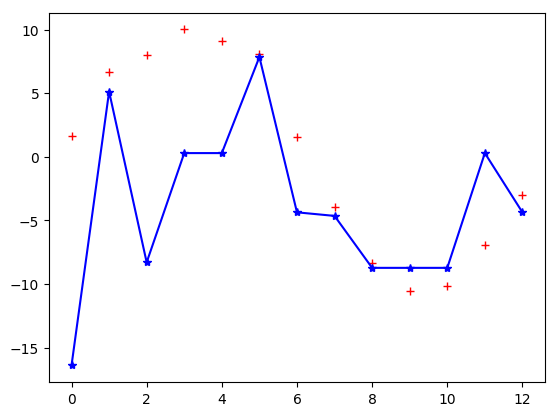

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa357593950>

In [15]:
m1 = c[:m1][222];
s1 = c[:s1][222];
PyPlot.plot(y[1,:], linestyle="None", marker="+", color = "r")
PyPlot.plot(m1[s1], linestyle="-", marker="*", color = "b")

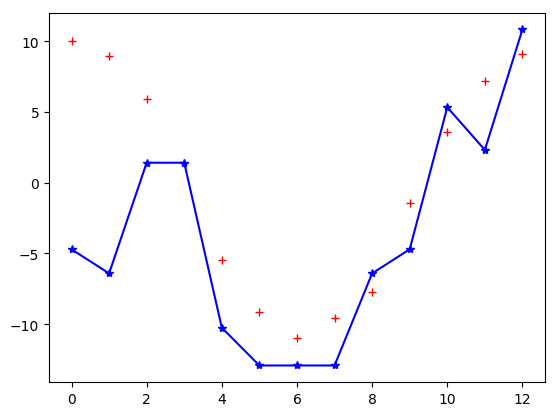

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa35740b890>

In [17]:
m2 = c[:m2][222];
s2 = c[:s2][222];
PyPlot.plot(y[2,:], linestyle="None", marker="+", color = "r")
PyPlot.plot(m2[s2], linestyle="-", marker="*", color = "b")